In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np


DPV = 0.07537  #dimensionless_potential_variable 

In [20]:
font = {'size'   : 22,
       'weight' : 55}
plt.rc('font', **font)


def plot_potential_chart(x: list, v: list,
                         x_min: float = -0.02, x_max: float = 20.02,
                         y_min: float = -20.0, y_max: float = 800.0,
                         chart_name: str = "crystal_pot.png"):
    plt.figure(figsize=(10.0,10.0))
    plt.title('V(x)')
    plt.xlabel('$x[a_0]$')
    plt.ylabel('V[eV]')
    plt.ylim(y_min,y_max)
    plt.xlim(x_min,x_max)
    plt.plot(x,v,'black')
    plt.savefig(chart_name)
    plt.show()

def plot_energy_band(e: list, f: list, char_name: str = 'band.png'):
    plt.figure(figsize=(15.0,15.0))
    plt.ylim(-1.0,1.0)
    plt.xlim(0.0, max(e)+1.0)
    plt.ylabel('$\Psi$')
    plt.xlabel('E[ev]')
    plt.plot(e,f,'black')
    plt.plot([0, max(e)+1.0],[0, 0], 'blue')
    plt.savefig(char_name)
    plt.show()
    
def plot_energy_band_values(e: list,  char_name: str = 'bandvalues.png'):
    plt.figure(figsize=(15.0,15.0))
    #plt.ylim(-1.0,1.0)
    plt.ylabel('E[ev]')
    plt.xlabel('Stan')
    plt.xlim(-0.5,50.5)
    plt.ylim(0.0,1000.0)
    plt.plot(S,E_S,'black',linestyle='', marker='o')
    #plt.plot([0, 1000],[0, 0], 'blue')
    plt.savefig('stany4.png')
    plt.show()

In [15]:
def wave_function_energy_relation(dx: float = 0.025, potential_base: int = 300,
                                  e_min: float = 1.0, e_max: float = 1000.0, delta_e: float = 0.005):
    N = int(20/dx)+1
    Fi = np.zeros([N])               #wave function
    V = np.zeros([N])                #potential
    # potential definition
    for i in range (1,int(0.25/dx)):
        V[i] = potential_base*DPV
        V[N-1-i] = potential_base*DPV
        
    # boundary conditions
    V[0] = potential_base*DPV*1000
    V[N-1] = potential_base*DPV*1000
    
    #generate crystal potential
    for i in range (1,9):
        V[int((0.25+2.0*i)/dx)] = potential_base*DPV/2.0
        V[int((1.75+2.0*i)/dx)] = potential_base*DPV/2.0
        
    for i in range (0,9):
        for j in range (1,int(0.5/dx)):
            V[int((1.75+2.0*i)/dx)+j] = potential_base*DPV
    
    for i in range (0,N):
        V[i] = V[i] +(i/N*40.0-20.0)*DPV
    
    V_R,X_R = [],[]
    for i in range(0,N):
        X_R.append(i*dx)
        V_R.append(V[i]/DPV)

    energy = (x for x in np.arange(e_min, e_max, delta_e))
    Fi_N,E_R = [],[]
    Fi[0] = 0.0
    Fi[1] = 1.0
    
    for e in energy:
        E = e *0.07537
        xno = 0
        for i in range(1,N-1):
            Fi[i+1] = Fi[i]*(2.0+dx*dx*(V[i]-E))-Fi[i-1]
        Fi_N.append(Fi[N-1])
        E_R.append(e)
        
    return E_R, Fi_N, X_R, V_R


def iteracja_energy_dokl(e):
    dx = 0.025                       #krok siatki w j.a 
    N = int(20/dx)+1
    Fi = np.zeros([N])               #tablica funkcji falowej
    V = np.zeros([N])                #tab poencjalu
    #definicja potencjalu
    #*0,07357 -def bezwymiarowej
    for i in range (1,int(0.25/dx)):
        V[i] = 300*0.07537
        V[N-1-i] = 300*0.07537
    
    V[0] = 100
    V[N-1] = 100
    
    for i in range (1,9):
        V[int((0.25+2.0*i)/dx)] = 300*0.07537/2.0
        V[int((1.75+2.0*i)/dx)] = 300*0.07537/2.0
        
    for i in range (0,9):
        for j in range (1,int(0.5/dx)):
            V[int((1.75+2.0*i)/dx)+j] = 300*0.07537
    for i in range (0,N):
        V[i] = V[i] +(i/N*40.0-20.0)*0.07537
    
    X, F = [],[]
        
    energy = (x for x in np.arange(e-0.005, e+0.005, 0.000001))
    Fi_N,E_R = [],[]
    Fi[0] = 0.0
    Fi[1] = 1.0
    
    X.append(0.0)
    X.append(dx)
    F.append(Fi[0])
    F.append(Fi[1])
    
    #E = e *0.07537
    xno = 0
    FN,EN = [],[]
    for en in energy:
        E = en*0.07537
        for i in range(1,N-1):
            Fi[i+1] = Fi[i]*(2.0+dx*dx*(V[i]-E))-Fi[i-1]
            #X.append((i+1)*dx)
            #F.append(Fi[i+1])
        
        FN.append(abs(Fi[N-1]))
        EN.append(en)
    ind = FN.index(min(FN))
    print(ind, EN[ind])
    X,F = iteracja_energy(EN[ind])      
    return X,F

def iteracja_energy(e):
    dx = 0.025                       #krok siatki w j.a 
    N = int(20/dx)+1
    Fi = np.zeros([N])               #tablica funkcji falowej
    V = np.zeros([N])                #tab poencjalu
    #definicja potencjalu
    #*0,07357 -def bezwymiarowej
    for i in range (1,int(0.25/dx)):
        V[i] = 300*0.07537
        V[N-1-i] = 300*0.07537
    
    V[0] = 100
    V[N-1] = 100
    
    for i in range (1,9):
        V[int((0.25+2.0*i)/dx)] = 300*0.07537/2.0
        V[int((1.75+2.0*i)/dx)] = 300*0.07537/2.0
        
    for i in range (0,9):
        for j in range (1,int(0.5/dx)):
            V[int((1.75+2.0*i)/dx)+j] = 300*0.07537
    for i in range (0,N):
        V[i] = V[i] +(i/N*40.0-20.0)*0.07537
    
    X, F = [],[]
        
    energy = (x for x in np.arange(1.0, 1000.0, 0.005))
    Fi_N,E_R = [],[]
    Fi[0] = 0.0
    Fi[1] = 1.0
    
    X.append(0.0)
    X.append(dx)
    F.append(Fi[0])
    F.append(Fi[1])
    
    E = e *0.07537
    xno = 0
    for i in range(1,N-1):
        Fi[i+1] = Fi[i]*(2.0+dx*dx*(V[i]-E))-Fi[i-1]
        X.append((i+1)*dx)
        F.append(Fi[i+1])

    return X,F


In [23]:
def get_band_values(f: list, band_number: int = 50):
    N = len(F)

    l_stanu = 0
    E_S,S = [],[]
    for i in range(1,N):
        if(F[i]*F[i-1]<=0.0):
            S.append(l_stanu)
            if(abs(F[i])<abs(F[i-1])):
                E_S.append(E[i])
            else:
                E_S.append(E[i-1])

            l_stanu+=1
            if(l_stanu>=band_number):
                break
    file = open("energy_band_values.dat","w+")
    ER = []
    for energy in E_S:
        ER.append(str(round(float(energy),4)))
        file.write(str(round(float(energy),4)))
        file.write('\n')
    file.close()
    return S, E_S

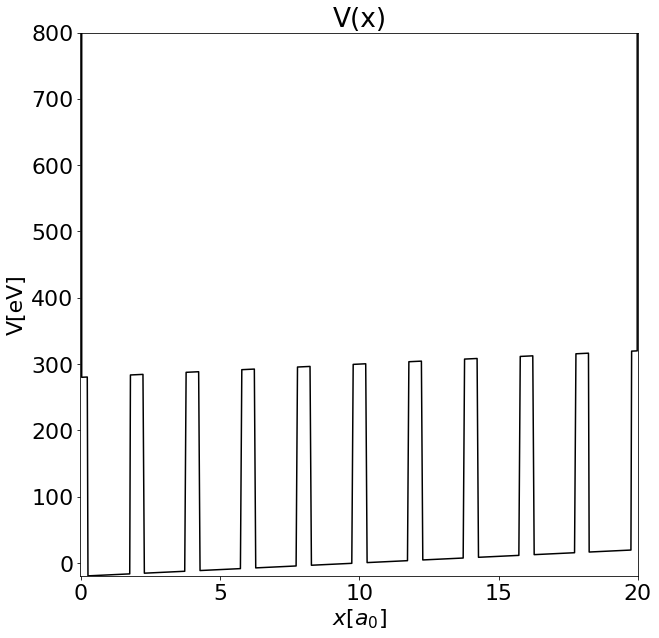

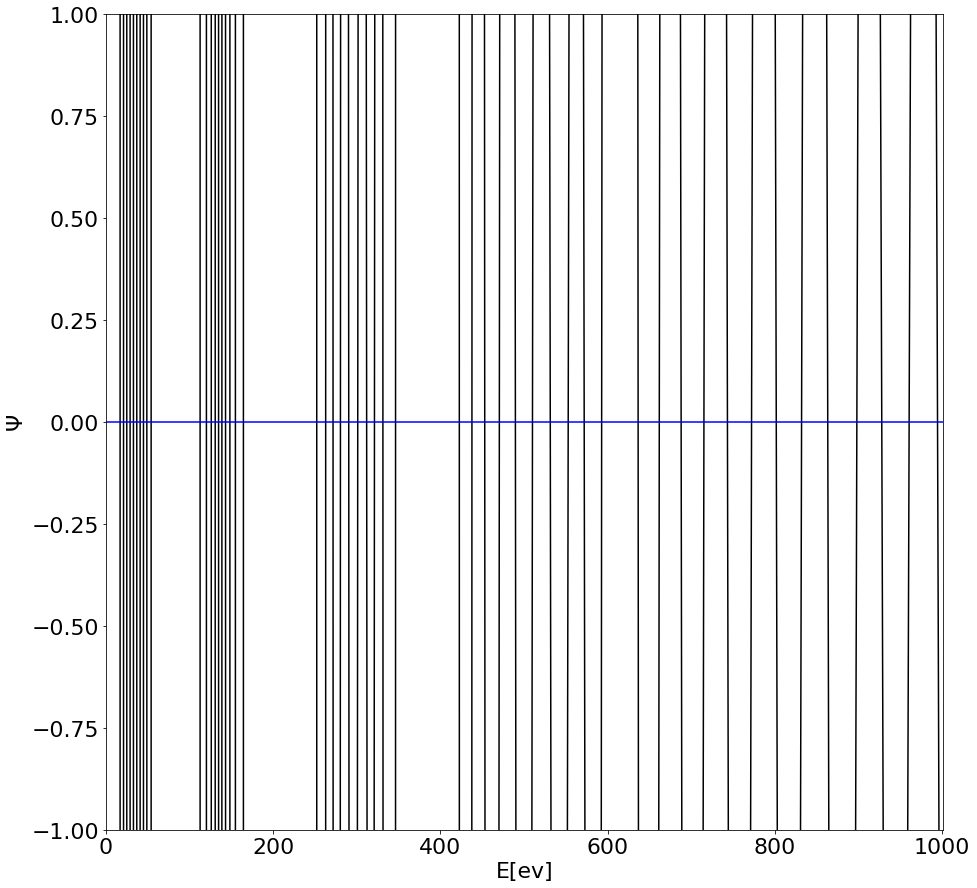

In [24]:
# E,F,X,V = [],[],[],[]
E,F,X,V = wave_function_energy_relation()

plot_potential_chart(X,V)
plot_energy_band(E,F)

In [25]:
S, E_S = get_band_values(E, len(E))

In [41]:
def iteracja_energy2(e):
    dx = 0.025                       #krok siatki w j.a 
    N = int(20/dx)+1
    Fi = np.zeros([N])               #tablica funkcji falowej
    V = np.zeros([N])                #tab poencjalu
    #definicja potencjalu
    #*0,07357 -def bezwymiarowej
    for i in range (1,int(0.25/dx)):
        V[i] = 300*0.07537
        V[N-1-i] = 300*0.07537
    
    V[0] = 100
    V[N-1] = 100
    
    for i in range (1,9):
        V[int((0.25+2.0*i)/dx)] = 300*0.07537/2.0
        V[int((1.75+2.0*i)/dx)] = 300*0.07537/2.0
        
    for i in range (0,9):
        for j in range (1,int(0.5/dx)):
            V[int((1.75+2.0*i)/dx)+j] = 300*0.07537
    
    X, F = [],[]
        
    energy = (x for x in np.arange(1.0, 1000.0, 0.005))
    Fi_N,E_R = [],[]
    Fi[0] = 0.0
    Fi[1] = 1.0
    
    X.append(0.0)
    X.append(dx)
    F.append(Fi[0])
    F.append(Fi[1])
    
    E = e *0.07537
    xno = 0
    for i in range(1,N-1):
        Fi[i+1] = Fi[i]*(2.0+dx*dx*(V[i]-E))-Fi[i-1]
        X.append((i+1)*dx)
        F.append(Fi[i+1])

    return X,F

ER_S0,ER_1 = [],[]
file  = open("1.dat","r+")
for line in file:
    f_line = line.split()
    ER_S0.append(float(f_line[0]))
    
file1  = open("4a.dat","r+")
for line in file:
    f_line = line.split()
    ER_1.append(float(f_line[0]))

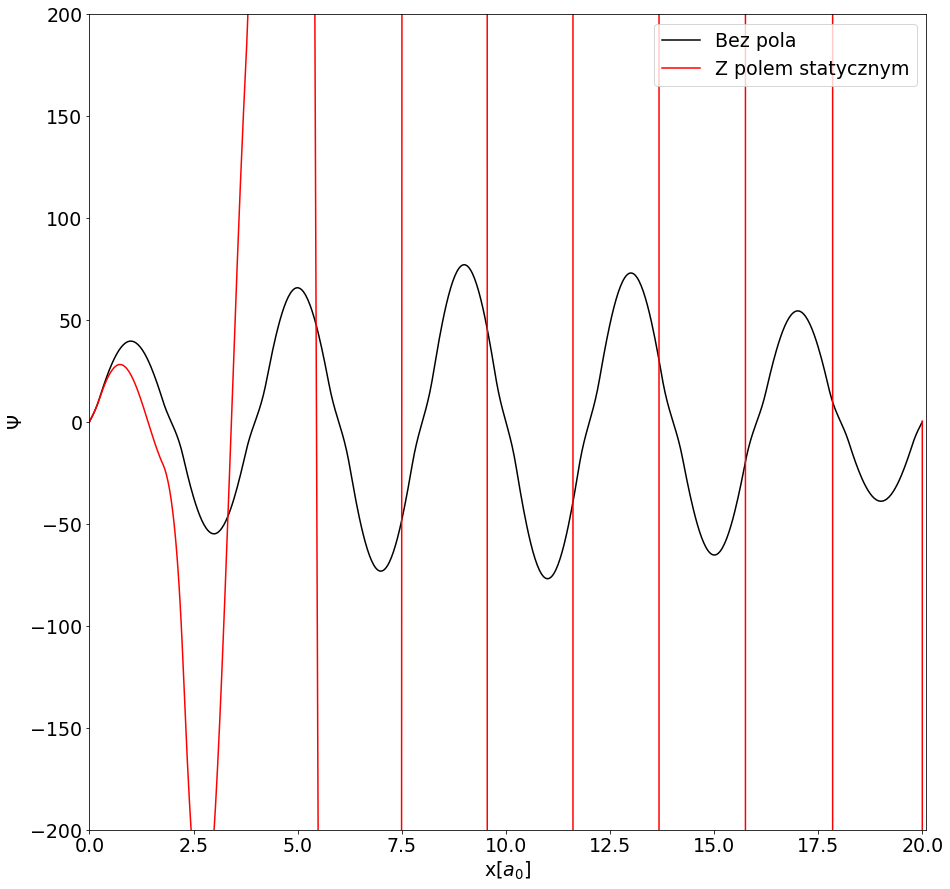

In [78]:
#17.06765135247meV
#54.18934128
#112.751343
#164.5422
#252.245
X1,F1 = iteracja_energy2(ER_S0[9])
X2,F2 = iteracja_energy(54.18934128)
font = {'size'   : 19,
       'weight' : 50}
plt.rc('font', **font)

plt.figure(figsize=(15.0,15.0))
plt.ylim(-200.0,200.0)
plt.ylabel('$\Psi$')
plt.xlabel('x[$a_0$]')
plt.xlim(0.0,20.1)
plt.plot(X1,F1,'black',label = 'Bez pola')
plt.plot(X2,F2,'red',label = 'Z polem statycznym')
#plt.plot([0, 20],[0, 0], 'blue')
#plt.plot([0, 1000],[0, 0], 'blue')
plt.legend(loc = 'upper right')
plt.savefig('stany4_precyzja10.png')
plt.show()

In [ ]:
print()